In [3]:
import matplotlib.pyplot as plt
import seaborn as sea
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import random
import math

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

import scipy.spatial.distance as dist
from scipy import stats
import statistics as stat
from scipy.stats import wasserstein_distance
from scipy.spatial.distance import jensenshannon

plt.rcParams['svg.fonttype'] = 'none'

## Import Cluster CCFs and leision locations

In [7]:
unique_locations = ['Liver','Lung','cfDNA','Chest', 'Lymph','Abdomen','Skin','Breast']

In [8]:

pat_1002_cluster = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1002_pre_post_updated/1002_with_pre_post.cluster_ccfs.txt", sep='\t',
                      low_memory=False)
pat_1598_cluster = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1598_new_pon_results/1598.cluster_ccfs.txt", sep='\t')
pat_1078_cluster = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1078_new_pon_results/1078.cluster_ccfs.txt", sep='\t')
pat_1326_cluster = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1326_firecloud_phylo/1326_cfDNA_high_purity.cluster_ccfs.txt", sep='\t')
pat_1644_cluster = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1644_passed_muts_results/1644.cluster_ccfs.txt", sep='\t')
pat_2819_cluster = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/2819_passed_muts_results/2819.cluster_ccfs.txt", sep='\t',
                      low_memory=False)
pat_2389_cluster = pd.read_csv("/Users/lmartin/Documents/2023/2389_multiple_6_bl_tree_0515/2389_multiple_6_bl_tree_v1/2389_multiple_6.cluster_ccfs.txt", sep='\t')
pat_2974_cluster = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/2974_new_pon_results/2974.cluster_ccfs.txt", sep='\t')
pat_1035_cluster = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1035_with_indel/1035.cluster_ccfs.txt", sep='\t')

pat_1534_cluster = pd.read_csv('~/Documents/2024/RA_1534_vm_new_bams/RA_1534_bl_TBX/1534_bl_TBX/1534.cluster_ccfs.txt',sep='\t')

pat_1547_cluster = pd.read_csv('~/Documents/2020/new_pon_breast_phylo/1547_0915/1547_newer_bl_tree/1547.cluster_ccfs.txt',sep='\t',
                          low_memory=False)
pat_1558_cluster = pd.read_csv('~/Documents/2023/RA_1558_fix_pies/take_3/1558_fix_pies_v3/1558.cluster_ccfs.txt',sep='\t')
pat_2542_cluster = pd.read_csv('~/Documents/2023/RA_2542_PIK3CA/2542_high_purity_v6_morebl_moreiter_results/2542_high_purity_v6_morebl_moreiter.cluster_ccfs.txt',sep='\t')
pat_1045_cluster = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1045_vm_phylo_results/1045.cluster_ccfs.txt",sep='\t')
pat_1113_cluster = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1113_vm_phylo_results/1113.cluster_ccfs.txt",sep='\t')


pats_cluster_ccfs_list = [pat_1002_cluster, pat_1598_cluster, pat_1078_cluster, pat_1045_cluster, pat_1113_cluster,
            pat_1326_cluster, pat_1644_cluster, pat_2819_cluster, pat_2389_cluster, pat_2974_cluster, pat_1035_cluster, pat_1534_cluster,
                         pat_1547_cluster,pat_1558_cluster, pat_2542_cluster]

cluster_ccfs_df=pd.concat(pats_cluster_ccfs_list)


In [9]:
new_sample_names_2389 = ['Chest_A',
 'Chest_B',
 'Chest_C',
 'Abdomen_D',
 'Lung_E',
 'Lung_F',
 'Lung_G',
 'Lung_H',
 'Lung_I',
 'Lung_J',
 'Lung_K',
 'Lymph_node_L',
 'Chest_M',
 'Lung_N',
 'Lung_O',
 'Lung_P',
 'Chest_Q',
 'Breast_R',
 'Breast_S',
 'Breast_T']

new_sample_names_1002 = ['Skin_B1',
 'Skin_B2',
 'cfDNA_A1',
 'cfDNA_A2',
 'cfDNA_A3',
 'Chest_I',
 'Skin_B3',
 'Chest_R',
 'Lung_D',
 'Lung_L',
 'Lung_M',
 'Lung_G',
 'Lung_H',
 'Abdomen_O',
 'Lymph_node_F',
 'Abdomen_N',
 'Lung_J',
 'Skin_K',
 'Skin_Q',
 'Lymph_node_E',
 'Skin_C',
 'Abdomen_P']


new_sample_names_1598 = ['cfDNA_3775',
 'cfDNA_3803',
 'cfDNA_3830',
 'cfDNA_3858',
 'cfDNA_3886',
 'cfDNA_3913',
 'cfDNA_3942',
 'cfDNA_3970',
 'cfDNA_3998',
 'cfDNA_4026',
 'cfDNA_4054',
 'Lung_A',
 'Lymph_node_B',
 'Lymph_node_C',
 'Liver_D',
 'Liver_E',
 'Liver_F',
 'Liver_G',
 'Liver_H',
 'Liver_I',
 'Liver_J',
 'Liver_K',
 'Lymph_node_L',
 'Liver_M']

new_sample_names_1078 = ['cfDNA_0077',
 'cfDNA_0131',
 'cfDNA_0238',
 'cfDNA_0312',
 'Liver_A',
 'Liver_B',
 'Liver_C',
 'Liver_D',
 'Lymph_node_E',
 'Liver_F',
 'Liver_G',
 'Liver_H',
 'Liver_I',
 'Liver_J']

new_sample_names_1045 = ['cfDNA_2694',
 'cfDNA_2750',
 'cfDNA_2806',
 'cfDNA_2918',
 'cfDNA_2971',
 'cfDNA_2999',
 'cfDNA_3017',
 'Liver_A',
 'Liver_B',
 'Liver_C',
 'Liver_D',
 'Liver_E',
 'Liver_F',
 'Liver_G',
 'Liver_H',
 'Liver_I',
 'Liver_J',
 'Liver_K',
 'Liver_L',
 'Liver_M',
 'Lymph_node_N',
 'Lymph_node_O']

new_sample_names_1113 = ['Liver_A', 'Lung_B', 'Liver_C', 'Liver_D', 'Liver_E']

new_sample_names_1326 = ['cfDNA_BWES00001',
 'cfDNA_BWES00167',
 'Breast_3',
 'Chest_4',
 'Liver_5',
 'Liver_6',
 'Liver_7',
 'Liver_8',
 'Liver_9',
 'Liver_10']

new_sample_names_1644 = ['Lung_A', 'Lung_B', 'Lung_C', 'Lung_D', 'Lung_E']

new_sample_names_2819 = ['cfDNA_7916',
 'cfDNA_7937',
 'cfDNA_8239',
 'Lymph_node_A',
 'Lymph_node_B',
 'Liver_C',
 'Liver_D',
 'Liver_E',
 'Liver_F',
 'Abdomen_F',
 'Lymph_node_H',
 'Liver_I',
 'Liver_J',
 'Lymph_node_K',
 'Liver_L']

new_sample_names_2974 = ['cfDNA_1976',
 'Liver_A',
 'Abdomen_B',
 'Liver_C',
 'Liver_D',
 'Liver_E',
 'Liver_F',
 'Abdomen_G',
 'Abdomen_H',
 'Abdomen_I',
 'Abdomen_J',
 'Abdomen_K']

new_sample_names_1035 = ['Lung_A',
 'Liver_B',
 'Liver_C',
 'Liver_G',
 'Lung_D',
 'Chest_E',
 'Throat_I',
 'Abdomen_F',
 'Abdomen_H']

new_sample_names_1534 = ['Abdomen_A',
 'Abdomen_B',
 'Abdomen_C',
 'Abdomen_D',
 'Chest_E',
 'Liver_F']

new_sample_names_1547 = ['cfDNA_1995',
 'cfDNA_2044',
 'cfDNA_2070',
 'cfDNA_2114',
 'cfDNA_2177',
 'Liver_A',
 'Liver_B',
 'Liver_C',
 'Liver_D',
 'Liver_E',
 'Liver_F',
 'Liver_G',
 'Liver_H',
 'Liver_I']

new_sample_names_1558 = ['cfDNA_RA_1558_cfDNA_3',
 'cfDNA_RA_1558_cfDNA_4',
 'cfDNA_RA_1558_cfDNA_5',
 'cfDNA_RA_1558_cfDNA_6',
 'cfDNA_RA_1558_cfDNA_7',
 'Lung_1558_2',
 'Lung_1558_3',
 'Lymph_node_1558_5',
 'Liver_1558_6',
 'Liver_1558_7',
 'Liver_1558_8',
 'Liver_1558_9',
 'Liver_1558_10',
 'Liver_1558_11',
 'Liver_1558_12',
 'Abdomen_1558_16',
 'Lymph_node_1558_17',
 'Lymph_node_1558_18',
 'Chest_1558_20']

new_sample_names_2542 = ['Chest_2542_1',
 'Chest_2542_2',
 'Chest_2542_3',
 'Abdomen_2542_12',
 'Abdomen_2542_13']


new_sample_names_in_order = [new_sample_names_1002,
 new_sample_names_1598,
 new_sample_names_1078,
 new_sample_names_1045,
 new_sample_names_1113,
 new_sample_names_1326,
 new_sample_names_1644,
 new_sample_names_2819,
 new_sample_names_2389,
 new_sample_names_2974,
 new_sample_names_1035,
 new_sample_names_1534,
 new_sample_names_1547,
 new_sample_names_1558,
 new_sample_names_2542]

In [12]:
pat_num_samples_on_tree = []
for cluster_ccfs in pats_cluster_ccfs_list:
    pat_num_samples_on_tree.append(list(cluster_ccfs['Sample_ID'].unique()))

pat_1002_num_clusters_on_tree = [5,6,8,18,15,17,14,20,16,19,10,12,13,11,19,21]
pat_1598_num_clusters_on_tree =[6,2,5,3,4,7,8,9]
pat_1078_num_clusters_on_tree =[2, 3, 4, 5, 6]
pat_1045_num_clusters_on_tree =[3,10,9,14,4,13,15,11]
pat_1113_num_clusters_on_tree =[10,2,8,3,5,12]
pat_1326_num_clusters_on_tree =[2,9,12,13,6,10]
pat_1644_num_clusters_on_tree = [3,6,7,8]

pat_2819_num_clusters_on_tree =[5,6,7,10,11,8,9]
pat_2389_num_clusters_on_tree=[3,5,16,10,14,12,4,9,15,7,17,6,11,13,18]
pat_2974_num_clusters_on_tree=[4,6,3,2,5]
pat_1035_num_clusters_on_tree=[7,4,10,6,5,9,8]
pat_1534_num_clusters_on_tree=[2, 3, 4]
pat_1547_num_clusters_on_tree=[8,15,2,12,6,9,13]
pat_1558_num_clusters_on_tree=[4,8,3,7,2,5,6,10,11,9]
pat_2542_num_clusters_on_tree=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

clusters_on_tree_list = [pat_1002_num_clusters_on_tree, pat_1598_num_clusters_on_tree, 
                         pat_1078_num_clusters_on_tree, pat_1045_num_clusters_on_tree, 
                          pat_1113_num_clusters_on_tree,
                pat_1326_num_clusters_on_tree, pat_1644_num_clusters_on_tree, 
                         pat_2819_num_clusters_on_tree, 
                          pat_2389_num_clusters_on_tree, pat_2974_num_clusters_on_tree, 
                         pat_1035_num_clusters_on_tree, pat_1534_num_clusters_on_tree,
                         pat_1547_num_clusters_on_tree,pat_1558_num_clusters_on_tree, 
                         pat_2542_num_clusters_on_tree]

## Calculate Earth Mover's Distances between samples in patients

In [33]:
def earth_movers_by_ccf_sum(ccfs_df, samples, clones_on_tree,patient_id, new_sample_names):

    # store distance dictionaries per clone
    clones_df_list = []
    
    # Compute pairwise Wasserstein distances for each clone
    for clone in clones_on_tree:

        all_samples_per_clone = ccfs_df[ccfs_df['Cluster_ID'] == clone]
        # initiate distance df per given clone
        clone_ccf_dist = pd.DataFrame(0.0, index=samples, columns=samples)
        
        # get sample pairs
        for i in range(len(samples)):
            for j in range(i + 1, len(samples)):
                # clone CCF dist for sample1
                sample1 = all_samples_per_clone[all_samples_per_clone['Sample_ID'] == samples[i]].iloc[:, 7:].values.flatten()
                # clone CCF dist for sample 2
                sample2 = all_samples_per_clone[all_samples_per_clone['Sample_ID'] == samples[j]].iloc[:, 7:].values.flatten()
                # Compute Wasserstein distance if both clones are present in both samples
                if sample1.size > 0 and sample2.size > 0:  # Ensure both samples have data
                    distance = wasserstein_distance(sample1, sample2)
                else:
                    distance = np.nan  # Handle cases where one or both samples have no data

                # Update the distance matrix
                # at square sample1,sample2 = distance
                clone_ccf_dist.iat[i, j] = distance
                clone_ccf_dist.iat[j, i] = distance  # Symmetric matrix
                
        # I am calculating the distance between 2 samples per every clone
        clones_df_list.append(clone_ccf_dist)

    # then the ccf distance for each pair of samples is the SUM of the distance between all of the clones in both samples
    # try sum instead of mean because the # of clones potentially brings in a confounder that biases towards the total number of clones present
    
    sum_ccf_dist = sum(clones_df_list)
    print(len(clones_df_list))
    sum_ccf_dist.rename(index=dict(zip(sum_ccf_dist.index, new_sample_names)), columns=dict(zip(sum_ccf_dist.columns, new_sample_names)), inplace=True)

    ## plotting code 
    return sum_ccf_dist

In [34]:
ccf_dist_df_2389= earth_movers_by_ccf_sum(pats_cluster_ccfs_list[8], 
                                              pat_num_samples_on_tree[8], 
                        clusters_on_tree_list[8], '2389',new_sample_names_2389)

15


In [15]:
ccf_dist_df_2389

,Chest_A,Chest_B,Chest_C,Abdomen_D,Lung_E,Lung_F,Lung_G,Lung_H,Lung_I,Lung_J,Lung_K,Lymph_node_L,Chest_M,Lung_N,Lung_O,Lung_P,Chest_Q,Breast_R,Breast_S,Breast_T
Chest_A,0.000000,0.009731,0.022096,0.045385,0.070446,0.064990,0.058711,0.060145,0.053792,0.071481,0.058748,0.006742,0.014325,0.015940,0.004131,0.039014,0.006135,0.053640,0.054332,0.055869
Chest_B,0.009731,0.000000,0.022827,0.047599,0.075813,0.070555,0.061505,0.065513,0.059160,0.073526,0.064115,0.008446,0.005226,0.016906,0.009228,0.030642,0.012423,0.059007,0.059699,0.061236
Chest_C,0.022096,0.022827,0.000000,0.060511,0.086733,0.080606,0.072355,0.076487,0.070133,0.083593,0.075090,0.017707,0.020670,0.026261,0.019518,0.036575,0.024309,0.069982,0.070674,0.072188
Abdomen_D,0.045385,0.047599,0.060511,0.000000,0.054675,0.050617,0.040215,0.045470,0.040953,0.043188,0.042982,0.043992,0.051977,0.039661,0.043859,0.056361,0.049427,0.049501,0.050718,0.054377
Lung_E,0.070446,0.075813,0.086733,0.054675,0.000000,0.036633,0.040694,0.033459,0.033397,0.075864,0.028413,0.069611,0.079843,0.068674,0.068966,0.076755,0.074717,0.050695,0.051667,0.046645
Lung_F,0.064990,0.070555,0.080606,0.050617,0.036633,0.000000,0.030340,0.012718,0.033797,0.053030,0.043211,0.063409,0.074739,0.062937,0.062484,0.071813,0.069433,0.051166,0.052043,0.048177
Lung_G,0.058711,0.061505,0.072355,0.040215,0.040694,0.030340,0.000000,0.027789,0.041082,0.045946,0.050147,0.056265,0.066139,0.053150,0.056190,0.060954,0.063024,0.053124,0.054810,0.058014
Lung_H,0.060145,0.065513,0.076487,0.045470,0.033459,0.012718,0.027789,0.000000,0.024288,0.049496,0.034052,0.059365,0.069597,0.057748,0.058665,0.065339,0.064417,0.041410,0.042091,0.040597
Lung_I,0.053792,0.059160,0.070133,0.040953,0.033397,0.033797,0.041082,0.024288,0.000000,0.057452,0.019491,0.053011,0.063243,0.051124,0.052312,0.058596,0.058064,0.025833,0.026299,0.024931
Lung_J,0.071481,0.073526,0.083593,0.043188,0.075864,0.053030,0.045946,0.049496,0.057452,0.000000,0.063754,0.068763,0.076336,0.064524,0.069049,0.067192,0.075523,0.054200,0.053887,0.054252


In [18]:
## compute for all patients
all_ccf_dist_dfs = []
patients_in_ccf_order = []
for i in range(len(pats_cluster_ccfs_list)):
    patient=list(pats_cluster_ccfs_list[i]['Patient_ID'].unique())[0]
    patients_in_ccf_order.append(patient)
    ccf_dist_df = earth_movers_by_ccf_sum(pats_cluster_ccfs_list[i], pat_num_samples_on_tree[i], 
                        clusters_on_tree_list[i], patient,new_sample_names_in_order[i])
    all_ccf_dist_dfs.append(ccf_dist_df)

In [22]:
## plot clustermap
def plot_EMD_matrix(EMD_matrix, patient_id):
    clustermap=sns.clustermap(EMD_matrix,cmap='Reds',row_cluster=True, col_cluster=True,
                             vmin=0, vmax=0.1, )
    #clustermap.ax_row_dendrogram.set_visible(False)
    #clustermap.ax_col_dendrogram.set_visible(False)
    clustermap.fig.suptitle('RA '+str(patient_id))
    #clustermap.savefig('Patient_' + str(patient_id)+'_'+'_Earth_Movers_CCF_Clustermap_Sum.svg',
            #dpi=300,bbox_inches='tight')
    return clustermap


/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


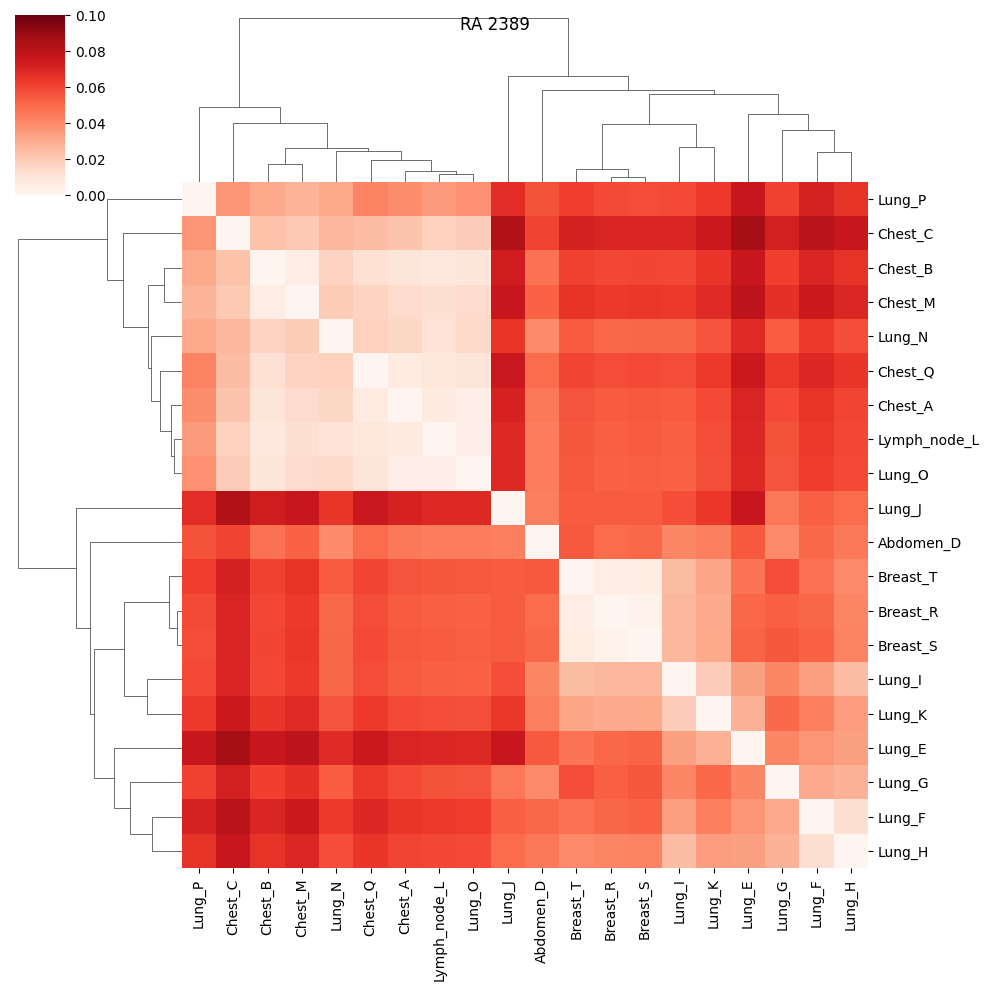

In [24]:
plot_EMD_matrix(ccf_dist_df_2389, '2389')

## Compare lesions within a patient

In [62]:
def compare_lesion_locations(pat_index, location):
    ccf_dist_pat = all_ccf_dist_dfs[pat_index]
    patient_id = patients_in_ccf_order[pat_index]
    loc = []
    for i,row in ccf_dist_pat.iterrows():
        if row.name.split('_')[0] == location:
            loc.append(row.name)
        
    loc_df = ccf_dist_pat[ccf_dist_pat.index.isin(loc)]
    loc_to_same_loc_df = loc_df[loc]
    not_loc_df = ccf_dist_pat[~ccf_dist_pat.index.isin(loc)]
    loc_to_not_loc_df = not_loc_df[loc]
    stat, p_val = stats.mannwhitneyu(loc_to_same_loc_df.median(axis=1), loc_to_not_loc_df.median(axis=1))
    
    
    same_no_nan = [val for val in loc_to_same_loc_df.median(axis=1) if not math.isnan(val)]
    diff_no_nan = [val for val in loc_to_not_loc_df.median(axis=1) if not math.isnan(val)]
    
    all_vals = same_no_nan + diff_no_nan

    input_bins=np.histogram_bin_edges(all_vals, 
            bins=(len(all_vals))+1, range=(min(all_vals),max(all_vals)), weights=None)
    
    fig,(ax1)=plt.subplots(nrows=1,ncols=1,figsize=(7,5))

    sns.histplot(loc_to_same_loc_df.median(axis=1),bins=input_bins,alpha=0.8,label=str(location) + " to "+str(location),ax=ax1,color='dodgerblue')
    sns.histplot(loc_to_not_loc_df.median(axis=1),bins=input_bins,alpha=0.8,label=str(location) + " to Other",ax=ax1,color='orange')
    ax1.legend(loc='upper right')
    x_coord = 0.05 * (ax1.get_xlim()[1] - ax1.get_xlim()[0]) + ax1.get_xlim()[0]
    y_coord = 0.95 * (ax1.get_ylim()[1] - ax1.get_ylim()[0]) + ax1.get_ylim()[0]

    ax1.text(x=x_coord, y=y_coord, s="p_value = " + str(round(p_val,5)), ha='left', va='top', fontsize=12)
    #ax1.set(ylim=(0, 5))
    #ax1.set(xlim=(0,0.005))
    
    fig.tight_layout()
    #fig.savefig(str(patient_id)+"_"+str(location)+"_distances_better_bins.svg")
    return p_val


np.float64(0.031209012771740218)

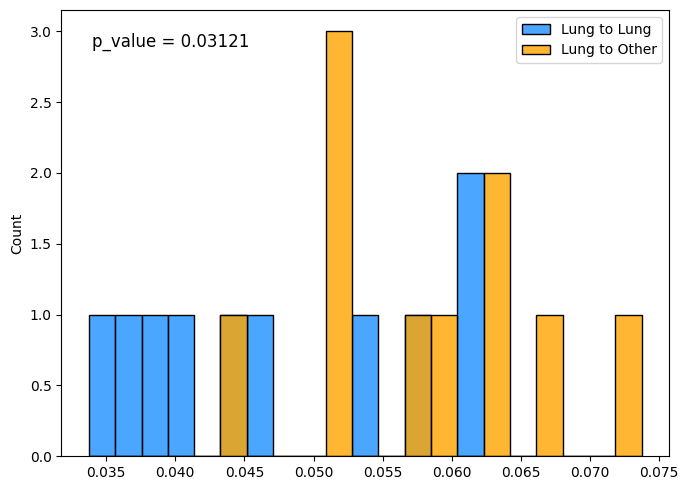

In [63]:
compare_lesion_locations(8,'Lung')

np.float64(0.02318819125884748)

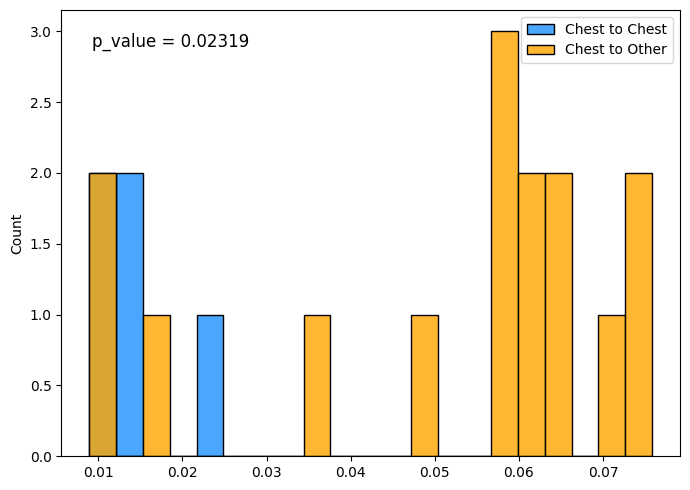

In [64]:
compare_lesion_locations(8,'Chest')

np.float64(0.00811430913711653)

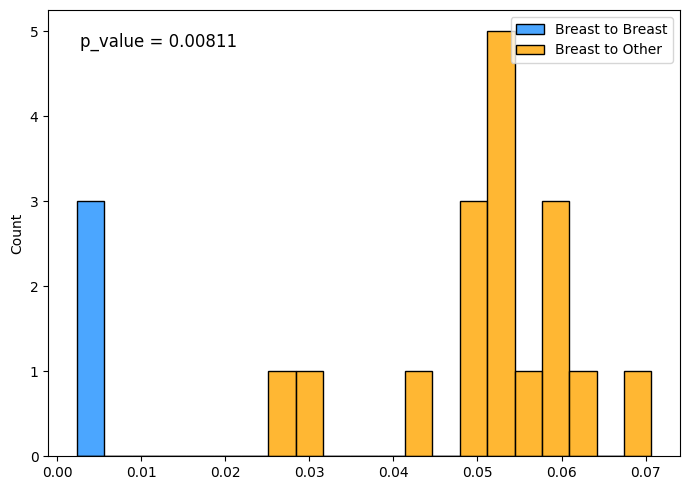

In [65]:
compare_lesion_locations(8,'Breast')

## Compare distances between organs across patients

In [43]:
def compare_all_sample_lesion_locations_same_location(pat_index, location):
    ccf_dist_pat = all_ccf_dist_dfs[pat_index]
    patient_id = patients_in_ccf_order[pat_index]
    loc = []
    for i,row in ccf_dist_pat.iterrows():
        if row.name.split('_')[0] == location:
            loc.append(row.name)
        
    loc_df = ccf_dist_pat[ccf_dist_pat.index.isin(loc)]
    loc_to_same_loc_df = loc_df[loc]
    not_loc_df = ccf_dist_pat[~ccf_dist_pat.index.isin(loc)]
    loc_to_not_loc_df = not_loc_df[loc]
    
    #stat, p_val = stats.mannwhitneyu(loc_to_same_loc_df.median(axis=1), loc_to_not_loc_df.median(axis=1))
 
    return list(loc_to_same_loc_df.median(axis=1).values)

def compare_all_sample_lesion_locations_diff_location(pat_index, location):
    ccf_dist_pat = all_ccf_dist_dfs[pat_index]
    patient_id = patients_in_ccf_order[pat_index]
    loc = []
    for i,row in ccf_dist_pat.iterrows():
        if row.name.split('_')[0] == location:
            loc.append(row.name)
        
    loc_df = ccf_dist_pat[ccf_dist_pat.index.isin(loc)]
    loc_to_same_loc_df = loc_df[loc]
    not_loc_df = ccf_dist_pat[~ccf_dist_pat.index.isin(loc)]
    loc_to_not_loc_df = not_loc_df[loc]
    
    #stat, p_val = stats.mannwhitneyu(loc_to_same_loc_df.median(axis=1), loc_to_not_loc_df.median(axis=1))
 
    return list(loc_to_not_loc_df.median(axis=1).values)


same_to_same_dict = {}
diff_dict = {}

for location in unique_locations:
    list_of_same_to_same_medians = []
    list_of_diff_locs_medians = []
    
    for i in range(len(all_ccf_dist_dfs)):
        same_to_same = compare_all_sample_lesion_locations_same_location(i,location)
        different_locs  = compare_all_sample_lesion_locations_diff_location(i,location)

        if len(same_to_same) > 2:
            for val in same_to_same:
                list_of_same_to_same_medians.append(val)
            
        if len(different_locs)>2:
            for val in different_locs:
                if not math.isnan(val):
                    list_of_diff_locs_medians.append(val)
                
    same_to_same_dict[location]=np.median(list_of_same_to_same_medians)
    diff_dict[location]=np.median(list_of_diff_locs_medians)

In [139]:
def compare_two_lesion_locations(pat_index, location1, location2):
    #get ccf dists
    ccf_dist_pat = all_ccf_dist_dfs[pat_index]
    patient_id = patients_in_ccf_order[pat_index]
    loc1 = []
    loc2= []
    for i,row in ccf_dist_pat.iterrows():
        if row.name.split('_')[0] == location1:
            loc1.append(row.name)
        if row.name.split('_')[0] == location2:
            loc2.append(row.name)
        
    loc1_df = ccf_dist_pat[ccf_dist_pat.index.isin(loc1)]
    loc2_df = ccf_dist_pat[ccf_dist_pat.index.isin(loc2)]


    loc1_to_loc2_df = loc1_df[loc2]
    loc2_to_loc1_df = loc2_df[loc1]

    #stat, p_val = stats.mannwhitneyu(loc_to_same_loc_df.median(axis=1), loc_to_not_loc_df.median(axis=1))
    #fig,(ax1)=plt.subplots(nrows=1,ncols=1,figsize=(7,5))

    #sns.histplot(list(loc1_to_loc2_df.median(axis=1).values),bins=15,alpha=0.8,label=str(location1)+ " to "+str(location2),ax=ax1,kde=True,color='dodgerblue')
    
    
    # I am returning rows of dataframe labeled with main location with columns with second loc
    # this affects the total number but generally not the result

    num_loc2_lesion = len(loc2_to_loc1_df)
    return list(loc1_to_loc2_df.median(axis=1).values), num_loc2_lesion

In [106]:
# RA 1598 example: 9 Liver lesions, 11 cfDNA lesions
# resulting comparison df computes 9 rows because we index by liver
# taking the mean of either dataframe computation (by rows or columns) returns nearly the same result
# however it does affect the number of points downstream because we have a row for every liver lesion
# so the fact that there are 60 cfDNA points means that there are cfDNA samples whenever there is a liver sample

compare_two_lesion_locations(1, 'Liver', 'cfDNA')

[np.float64(0.04972607505657516),
 np.float64(0.04524369998133971),
 np.float64(0.03356237595026229),
 np.float64(0.04685371899337949),
 np.float64(0.04763840512296322),
 np.float64(0.032238014285773275),
 np.float64(0.047342023710130195),
 np.float64(0.05399978825136942),
 np.float64(0.05790301239573547)]

In [98]:
# 1 lung lesion, 2 liver
compare_two_lesion_locations(4, 'Lung', 'Liver')

[np.float64(0.04134065543604695)]

In [148]:
def all_location_comparison(location):
    
    loc_dict = {}
    location_list={}

    
    for location2 in unique_locations:
        print(location2)
        loc_list=[]
        
        for i in range(len(all_ccf_dist_dfs)):
            #compare locations
            loc_to_loc, num_loc2_lesions =compare_two_lesion_locations(i, location, location2)
            location_list[location2]+=num_loc2_lesions
            print(num_loc2_lesions)
            print(loc_to_loc)
            """ 
            ## if there are a total of >5 comparisons
            if len(loc_to_loc) > 5:
                for val in loc_to_loc:
                    if not math.isnan(val):
                        loc_list.append(val)
            """
        for val in loc_to_loc:
            if not math.isnan(val):
                loc_list.append(val)

        
        loc_dict[location2]=loc_list
        
    print(location_list)
    print(loc_dict)
    location_comparison_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in loc_dict.items()]))
    medians = location_comparison_df.median()
    sorted_columns = medians.sort_values().index
    sorted_location_comparison_df = location_comparison_df[sorted_columns]
    
    
    fig,(ax1)=plt.subplots(nrows=1,ncols=1,figsize=(7,5))

    sns.boxplot(data=sorted_location_comparison_df,
               orient='v',
                   ax=ax1,color='grey',fill=False,showfliers=None).set_title("Clonal Composition Differences Between "+str(location)+" and Other Organs")
    
    
    sns.swarmplot(data=sorted_location_comparison_df,
               orient='v',
                   ax=ax1,color='grey',alpha=0.5,zorder=0.5)
    #ax1.set(ylim=(0, 0.015))
    ax1.set_xlabel('Lesion Location')
    ax1.set_ylabel('Distances')
    p_val_dict = {}
    locs_in_df = sorted_location_comparison_df.columns

    for i in range(len(locs_in_df)):
        for loc_index in range(i+1, len(locs_in_df)):
            loc1 = locs_in_df[i]
            loc2 = locs_in_df[loc_index]
            stat, p_val = stats.mannwhitneyu(loc_dict[loc1], loc_dict[loc2])
            comparison = str(location)+ " to " +str(loc1)+ " vs "+str(location)+ " to " +str(loc2)
            p_val_dict[comparison]=p_val

    num_comparisons_dict = {}
    for loc in locs_in_df:
        num_lesions = len(sorted_location_comparison_df[~sorted_location_comparison_df[loc].isna()])
        num_comparisons_dict[loc] = num_lesions

    ax1.set_xticks(range(len(locs_in_df)))

    ax1.set_xticklabels([f'{loc}: {num_comparisons_dict[loc]}' for loc in locs_in_df], rotation=45)

    x_coord = 0.05 * (ax1.get_xlim()[1] - ax1.get_xlim()[0]) + ax1.get_xlim()[0]
    y_coord = 0.95 * (ax1.get_ylim()[1] - ax1.get_ylim()[0]) + ax1.get_ylim()[0]

    fig.tight_layout()
    #fig.savefig(str(location)+"_to_other_locations_distances_boxplot.svg")
    return p_val_dict, sorted_location_comparison_df

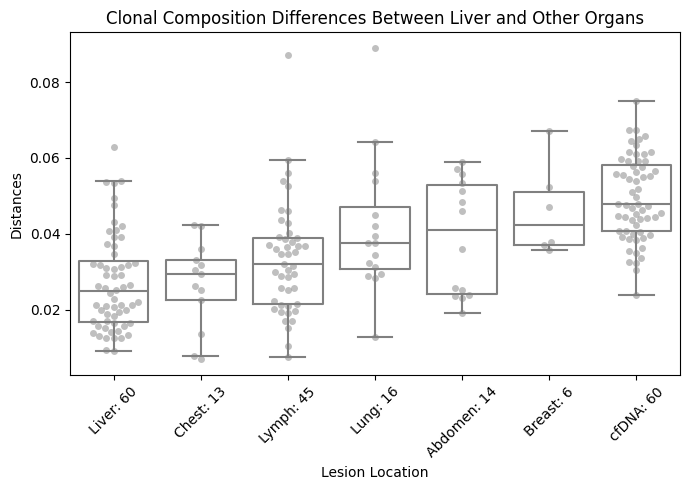

In [60]:
liver_comparison_dict, sorted_liver_locs = all_location_comparison('Liver')

In [57]:
liver_comparison_dict

{'Liver to Liver vs Liver to Chest': np.float64(0.7565513877607638),
 'Liver to Liver vs Liver to Lymph': np.float64(0.0189100982710588),
 'Liver to Liver vs Liver to Lung': np.float64(0.001132086649354137),
 'Liver to Liver vs Liver to Abdomen': np.float64(0.008216790591635648),
 'Liver to Liver vs Liver to Breast': np.float64(0.003603636044804063),
 'Liver to Liver vs Liver to cfDNA': np.float64(3.274978992810106e-14),
 'Liver to Chest vs Liver to Lymph': np.float64(0.23273359672748617),
 'Liver to Chest vs Liver to Lung': np.float64(0.021319539086252746),
 'Liver to Chest vs Liver to Abdomen': np.float64(0.09410063754661813),
 'Liver to Chest vs Liver to Breast': np.float64(0.0032434026242075774),
 'Liver to Chest vs Liver to cfDNA': np.float64(1.2227953279730169e-06),
 'Liver to Lymph vs Liver to Lung': np.float64(0.08664908900629452),
 'Liver to Lymph vs Liver to Abdomen': np.float64(0.19643934700965338),
 'Liver to Lymph vs Liver to Breast': np.float64(0.020597508198469026),
 'Li

In [149]:
cfDNA_comparison_dict, sorted_cfDNA_locs = all_location_comparison('cfDNA')

Liver


KeyError: 'Liver'

In [102]:
sorted_cfDNA_locs

,cfDNA,Liver,Lung,Lymph
0,0.043879,0.056335,0.035138,0.043304
1,0.040563,0.055583,0.062306,0.058361
2,0.023054,0.045244,0.057213,0.053266
3,0.020923,0.040964,0.047498,0.042163
4,0.027110,0.048061,0.061402,0.058578
5,0.022131,0.037410,0.044825,0.039041
6,0.021725,0.047342,0.039266,0.034434
7,0.020016,0.041904,0.057579,0.052884
8,0.021847,0.040783,0.037878,0.034224
9,0.021789,0.046947,0.050051,0.045762


In [61]:
cfDNA_comparison_dict

{'cfDNA to cfDNA vs cfDNA to Liver': np.float64(1.3577329202883785e-05),
 'cfDNA to cfDNA vs cfDNA to Lung': np.float64(0.00012133523665433079),
 'cfDNA to cfDNA vs cfDNA to Lymph': np.float64(1.0153954568697806e-05),
 'cfDNA to Liver vs cfDNA to Lung': np.float64(0.6693842468987063),
 'cfDNA to Liver vs cfDNA to Lymph': np.float64(0.6464067390155086),
 'cfDNA to Lung vs cfDNA to Lymph': np.float64(0.9820703872008743)}

{'Lung': [np.float64(0.03720059924798126), np.float64(0.09884444983133159), np.float64(0.02749650226387782), np.float64(0.04001434700629951), np.float64(0.05424060893120122), np.float64(0.030245847502531006), np.float64(0.03866352445054361), np.float64(0.039921602418790086), np.float64(0.043514201098351996), np.float64(0.033755496962141036), np.float64(0.03743940247609699), np.float64(0.060603057113195274), np.float64(0.04667882034666143), np.float64(0.05460999159292549), np.float64(0.056728619550612355), np.float64(0.06205817343609403)], 'cfDNA': [np.float64(0.08701525240623363), np.float64(0.075357453328091), np.float64(0.07559870800329836), np.float64(0.06605061759705856), np.float64(0.07561308548860074), np.float64(0.07714473263516097)], 'Chest': [np.float64(0.05695561210516248), np.float64(0.07429948326942931), np.float64(0.0775242946437858), np.float64(0.09681996134081677), np.float64(0.06420430367695189), np.float64(0.07605595847698106), np.float64(0.07581336160495798), np.float

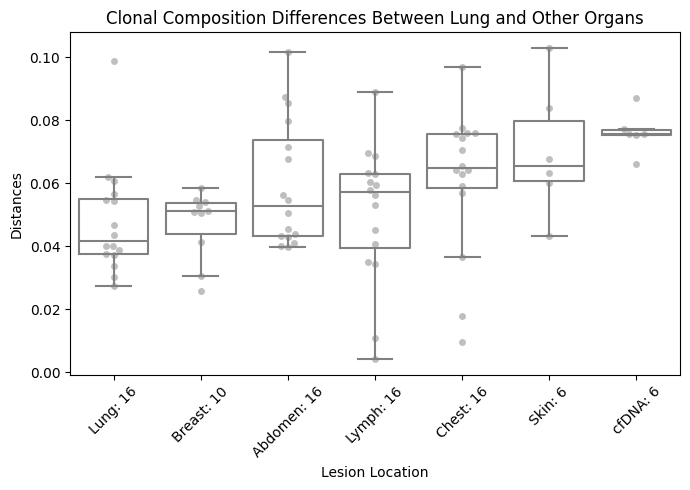

In [100]:
lung_comparison_dict, sorted_lung_locs = all_location_comparison('Lung')